<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

## Exercise 1: Output connectivity
    
    
<p>In the data walkthrough, we visualized the synapses of a single neuron, and also the connectivity between different cell types.

<p>In this first exercise, we will apply the <b>cell types to label the output synapses of a single neuron </b>

!add preview image
    
</div>

In [2]:
# Paths to compiled data for this workshop
syn_data_url = "https://github.com/sdorkenw/MICrONS_workshop_CNC_forum/raw/refs/heads/main/data/synapses_proofread_V1_neurons_1293.feather"
cell_data_url = "https://github.com/sdorkenw/MICrONS_workshop_CNC_forum/raw/refs/heads/main/data/cell_info_1293.feather" 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
   
<b> Install packages (if using Colab), import packages, and initialize CAVEclient
    
</div>

In [2]:
# !pip install skeleton_plot
# !pip install caveclient 

In [3]:
import caveclient
import skeleton_plot as skelplot

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
client = caveclient.CAVEclient("minnie65_phase3_v1")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 1.1
Reference the data walkthrough, and copy over the local functions  `plot_skeleton` and `filter_synapses`, as they will be critical for this exercise.
    
</div>

In [33]:
skel_color_map = {3: "firebrick", 4: "salmon", 2: "steelblue", 1: "olive"}

def plot_skeleton(sk_d: dict, plot_soma=True, ax=None):
    """Plots a skeleton.
    
    Args:
        sk: skeleton dict as returned from CAVEclient
        
    Returns: 
        ax: plot axes
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 10), dpi=150)
    
    skelplot.plot_tools.plot_verts(np.array(sk_d["vertices"]), np.array(sk_d["edges"]), radius=np.array(sk_d["radius"]) / 1000 * 1,
                                   ax=ax, skel_colors = sk_d["compartment"], title = "", skel_alpha = 1., 
                                   line_width = 5, x = 'x', y = 'y',  plot_soma = plot_soma, soma_node = sk_d["root"],
                                   color = 'darkslategray', soma_size = 120, invert_y = True, 
                                   skel_color_map = skel_color_map, x_min_max = None, 
                                   y_min_max = None, capstyle = "round", joinstyle = "round",)

    ax.spines['right'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['top'].set_visible(False) 
    ax.spines['bottom'].set_visible(False)
    ax.axis('off')
    
    return ax

def filter_synapse_table(synapse_table: pd.DataFrame, pre_root_ids=None, post_root_ids=None):   
    """Filter synapse table by pre and post root ids.

    Args:
        synapse_table: synapse table with pre_pt_root_ids and post_pt_root_ids as pd.DataFrame
        pre_root_ids: np.ndarray, list or pd.Series if root_ids to filter on the presynaptic side
        post_root_ids: np.ndarray, list or pd.Series if root_ids to filter on the postsynaptic side

    Returns:
        synapse_table: filtered synapse table
    """
    
    if pre_root_ids is not None:
        assert isinstance(pre_root_ids, (np.ndarray, list, pd.core.series.Series)), f"IDs have to be of type np.ndarray, list or pd.Series; got {type(pre_root_ids)}"
        pre_m = np.isin(synapse_table["pre_pt_root_id"], pre_root_ids)
    else:
        pre_m = np.ones(len(synapse_table), dtype=bool)
        
    if post_root_ids is not None:
        assert isinstance(post_root_ids, (np.ndarray, list, pd.core.series.Series)), f"IDs have to be of type np.ndarray, list or pd.Series; got {type(pre_root_ids)}"
        post_m = np.isin(synapse_table["post_pt_root_id"], post_root_ids)
    else:
        post_m = np.ones(len(synapse_table), dtype=bool)
        
    return synapse_table[pre_m & post_m]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 1.2
Load the <b>cell_df</b> dataframe, select one of the fully extended neurons, and plot the output using `plot_skeleton`.

Try iterating through several cells to select examples with a) dense local axon, b) long-range axon, and c) synapses across different cortical layers
    
</div>

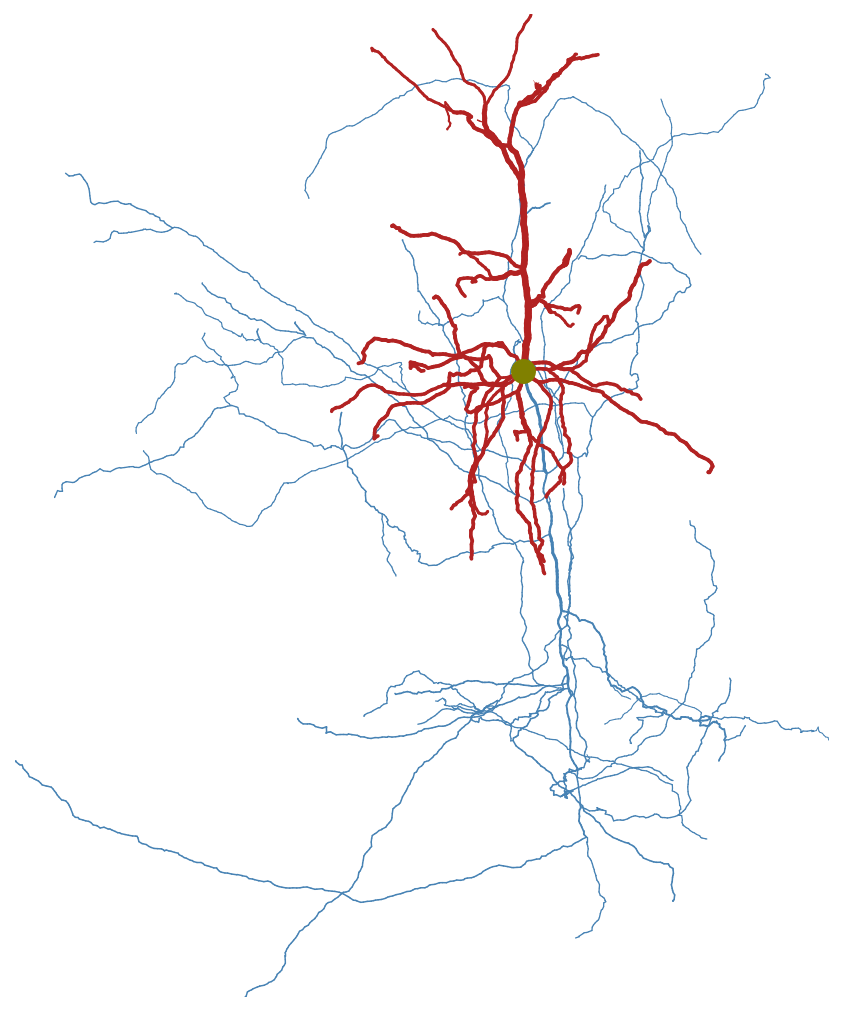

In [35]:
cell_df = pd.read_feather(cell_data_url)

root_id = cell_df[cell_df["proofreading_strategy"] == "axon_fully_extended"].iloc[3]["pt_root_id"]
sk_d = client.skeleton.get_skeleton(root_id, output_format="dict")

ax = plot_skeleton(sk_d)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 1.3
Collect the output synapses of your chosen cell (pre_root_ids=root_id), using the local function <b> filter_synapse_table </b> from the data walkthrough
    
</div>

In [36]:
# Load syn_df
syn_df = pd.read_feather(syn_data_url)

# filter output synapses
pre_syns = filter_synapse_table(syn_df, pre_root_ids=[root_id])

pre_syns

,id,ctr_pt_position_x,ctr_pt_position_y,ctr_pt_position_z,pre_pt_root_id,post_pt_root_id,size
1424,167994184,721456,733616,830000,864691135988769027,864691131921105585,736
3272,110242280,599840,439624,978200,864691135988769027,864691132117678230,5724
3326,165911119,722176,443760,864960,864691135988769027,864691132122911308,1628
4668,156639854,712304,392392,978760,864691135988769027,864691132234089570,3456
5193,58463756,481072,478928,852480,864691135988769027,864691132271207236,2296
...,...,...,...,...,...,...,...
6042114,130109181,647464,588424,877240,864691135988769027,864691137054478966,6840
6050887,182160996,755508,790708,721800,864691135988769027,864691137055294582,2792
6063956,138762329,661288,507152,839680,864691135988769027,864691137055544438,28400
6065680,104782978,573896,537544,716280,864691135988769027,864691137137574465,4412


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 1.4
Color the outgoing synapses by their target type. To do this:

1. Merge your `pre_syn` dataframe to the `cell_df` table. Merge on `post_pt_root_id` and `pt_root_id`, respectively.
2. Plot the synapses over the skeleton, using `ctr_pt_position_x` and `ctr_pt_position_y` as your x and y positions
3. Use the automated cell type prediction to color synapses by excitatory / inhibitory postsynaptic identity (the `coarse_cell_type_auto` column in the cell type table can be used here).
4. Use the automated cell type prediction to color synapses by <b>cell type</b> (the `cell_type_auto` column in the cell type table can be used here).  
    
Multiple publications reported a bias for inhibitory targets being overrepresented on the initial part of the axon and excitatory targets being dominant on the distal sections. Can you tell this bias for your neuron as well? 
    
</div>

In [21]:
# Merge pre_syns to cell_df
pre_syns_annot = pd.merge(pre_syns, cell_df[['pt_root_id','cell_type_auto','coarse_cell_type_auto']],
         left_on="post_pt_root_id", right_on="pt_root_id", how="left")
pre_syns_annot["cell_type_auto"].fillna("Unknown", inplace=True)
pre_syns_annot["cell_type_auto"].value_counts()

cell_type_auto
Unknown      187
23P          165
BC           159
5P-IT         94
5P-ET         83
MC            80
4P            57
6P-IT         12
6P-CT         11
BPC            5
NGC            3
microglia      2
astrocyte      2
oligo          1
5P-NP          1
pericyte       1
Name: count, dtype: int64

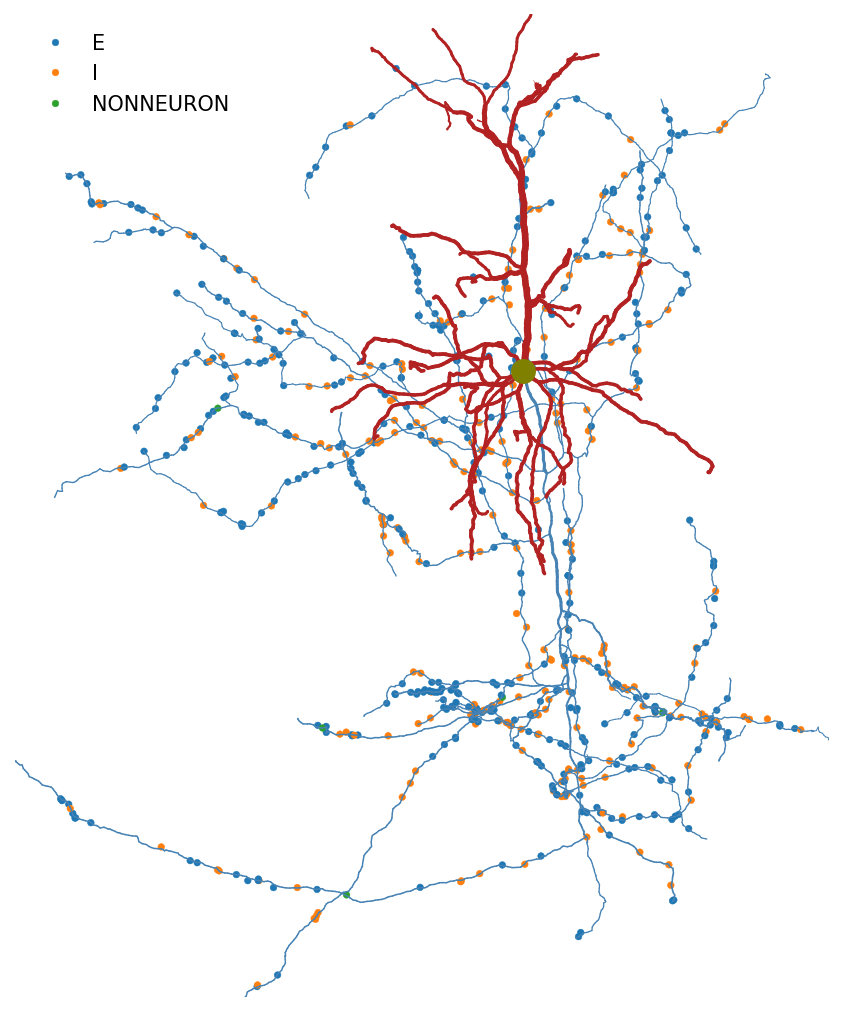

In [39]:
# Plot skeleton
ax = plot_skeleton(sk_d)

# Add synapses colored by coarse classification
# (suggested tip: use sns.scatterplot, with optional argument 'hue')
sns.scatterplot(data=pre_syns_annot, x="ctr_pt_position_x", y="ctr_pt_position_y", 
                s=10, hue="coarse_cell_type_auto", palette="tab10", ax=ax, edgecolor=None) 
ax.legend(frameon=False, loc="best")

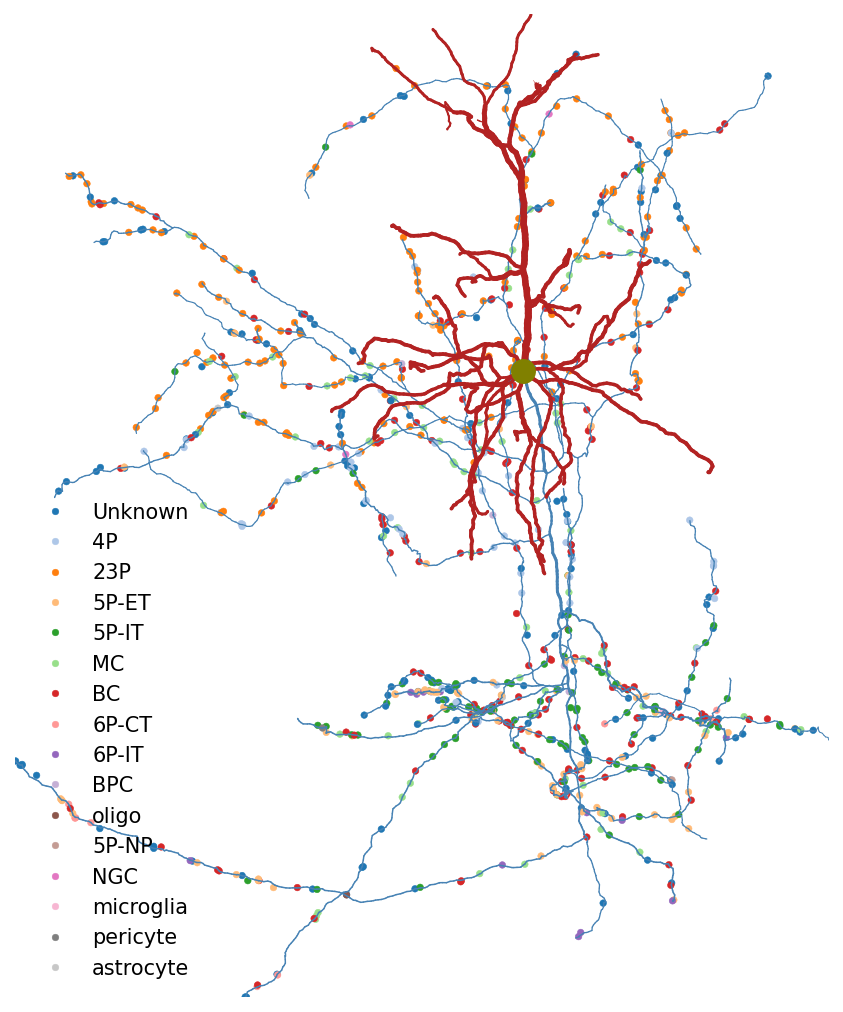

In [29]:
ax = plot_skeleton(sk_d)

sns.scatterplot(data=pre_syns_annot, x="ctr_pt_position_x", y="ctr_pt_position_y", 
                s=10, hue="cell_type_auto", palette="tab20", ax=ax, edgecolor=None) 
ax.legend(frameon=False, loc="best")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

### Task 1.5
Color the outgoing synapses by their <b> input type</b>. Use the automated cell type prediction to color synapses by excitatory / inhibitory presynaptic identity (the `coarse_cell_type_auto` column in the cell type table can be used here). 
    
What do the results of this plot, compared with Task 1.4, tell you about the inferences you can make in this dataset? 
    
</div>

In [41]:
# filter for input synapses
post_syns = filter_synapse_table(syn_df, post_root_ids=[root_id])

# merge post_syn to cell_df
post_syns_annot = pd.merge(post_syns, cell_df[['pt_root_id','cell_type_auto','coarse_cell_type_auto']],
         left_on="pre_pt_root_id", right_on="pt_root_id", how="left")
post_syns_annot["cell_type_auto"].fillna("Unknown", inplace=True)
post_syns_annot["cell_type_auto"].value_counts()

cell_type_auto
Unknown      2678
BC            157
MC            125
23P            38
4P             22
astrocyte      11
5P-IT          10
microglia       6
oligo           5
NGC             4
5P-ET           2
6P-IT           2
OPC             1
Name: count, dtype: int64

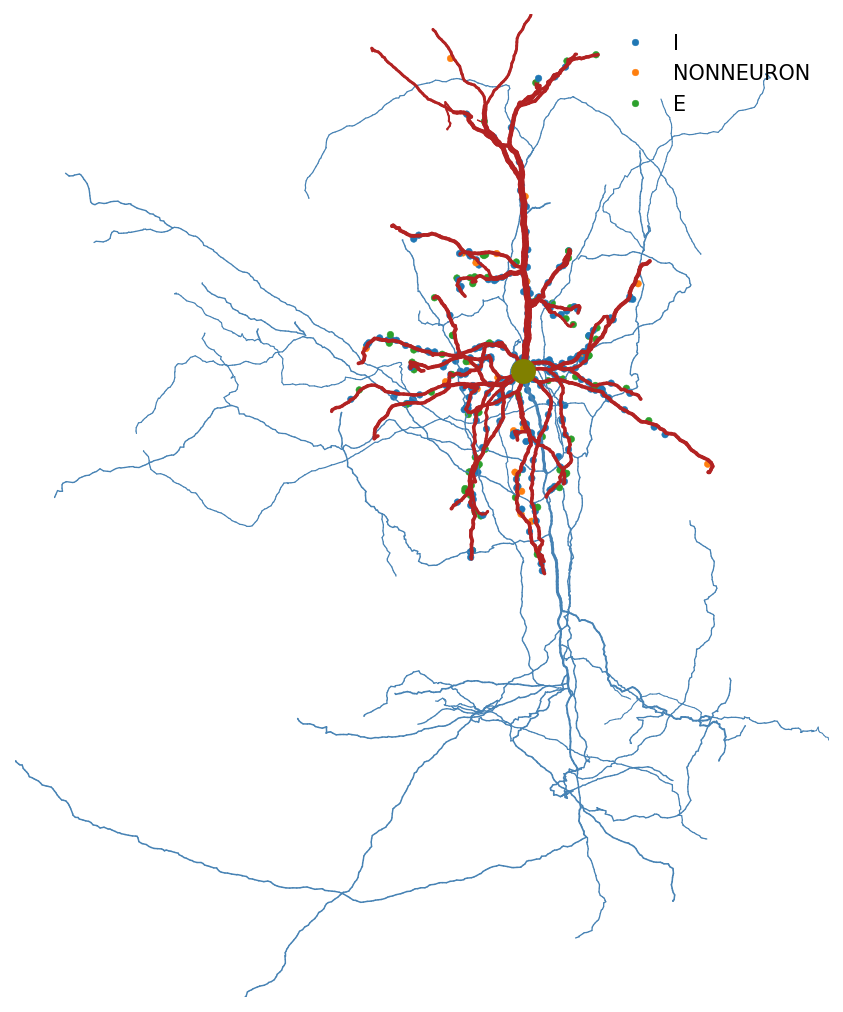

In [42]:
ax = plot_skeleton(sk_d)

sns.scatterplot(data=post_syns_annot, x="ctr_pt_position_x", y="ctr_pt_position_y", 
                s=10, hue="coarse_cell_type_auto", palette="tab10", ax=ax, edgecolor=None) 
ax.legend(frameon=False, loc="best")

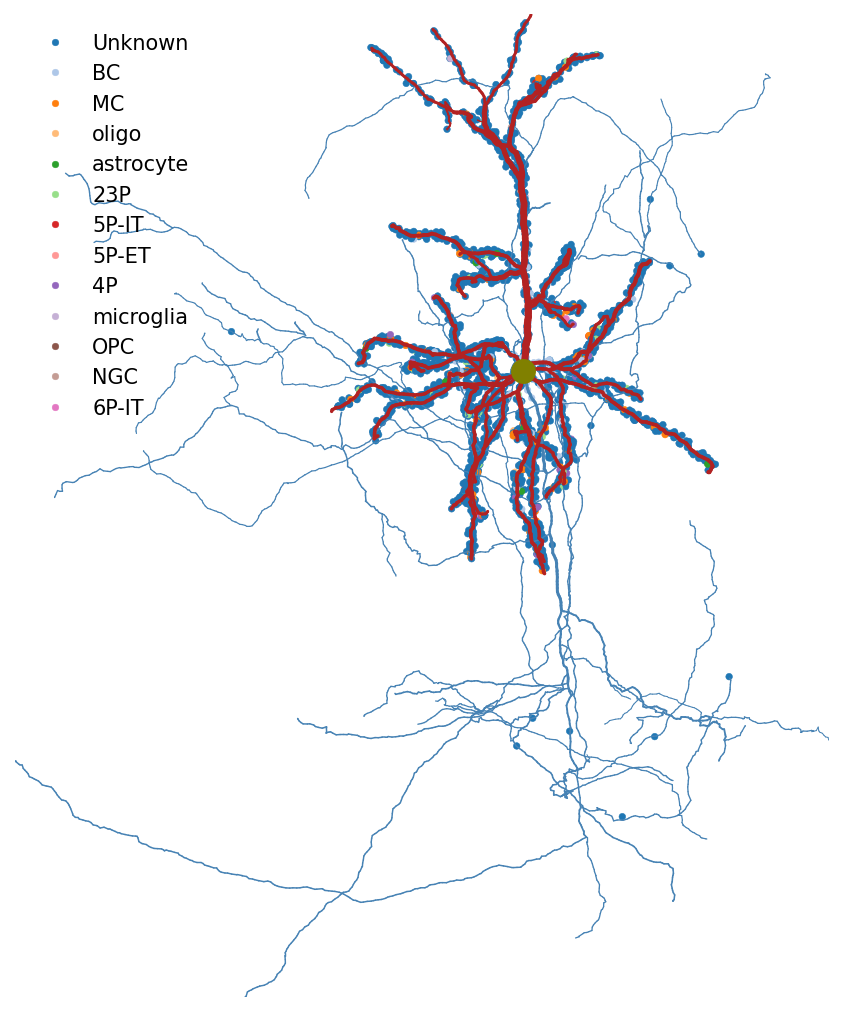

In [43]:
ax = plot_skeleton(sk_d)

sns.scatterplot(data=post_syns_annot, x="ctr_pt_position_x", y="ctr_pt_position_y", 
                s=10, hue="cell_type_auto", palette="tab20", ax=ax, edgecolor=None) 
ax.legend(frameon=False, loc="best")